# PREPROCESAMIENTO

INDICACIÓN: El preprocesado para sacar la columna de 'Juego' lo tengo que hacer desde Google Sheets con la función de filtro y a mano, por que hay vídeos de mi canal cuyo juego no está mencionado en el título, por lo cual no puedo sacar por Jupiter Notebooks los diferentes juegos de cada una de las filas (de cada uno de los videos). A su vez, he añadido la columna SEO para poner en función de cada juego cuanto sacaría de provecho el video en funcion de la demanda y la competitividad, pero ni el primero ni este último son útiles por que no correlan.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [38]:
data = pd.read_csv('../data/raw/dataset siralatriste.csv')
data.head(1)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,Duración media de las visualizaciones,Datos Duración media de las visualizaciones,Comentarios,Porcentaje de clics de las impresiones (%),Fecha
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,2.0,0:02:00,39,8.69,"Mar 2, 2015"


In [39]:
data.describe()

,Visualizaciones,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,Duración media de las visualizaciones,Comentarios,Porcentaje de clics de las impresiones (%)
count,496.000000,494.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,573.903226,52.789474,1.707661,20.699135,1.282258,2149.572581,76.146210,11.695565,2.857863,8.221774,2.573206
std,2911.772419,9.908722,7.043962,98.462350,5.264419,8444.136924,34.161675,79.404081,2.338207,37.582222,2.145878
min,25.000000,10.000000,0.000000,0.104200,-2.000000,61.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,39.000000,43.000000,0.000000,1.386150,0.000000,354.750000,57.942500,2.000000,1.100000,0.000000,1.120000
50%,69.000000,53.000000,0.000000,2.833700,0.000000,777.500000,100.000000,4.000000,2.300000,1.000000,1.955000
75%,232.250000,62.000000,1.000000,7.815450,0.000000,1942.500000,100.000000,7.000000,4.000000,3.000000,3.312500
max,47210.000000,76.000000,109.000000,1580.884600,42.000000,162259.000000,100.000000,1724.000000,17.000000,464.000000,12.150000


## SACAR LA MEDIA DE MIS VARIABLES EN FUNCIÓN DEL JUEGO

In [40]:
#para sacar la media de compartidos de cada uno de mis juegos 
data['Med Juego Compartido'] = data.groupby('Juego')['Compartido'].transform('mean')

In [41]:
#para sacar la media de comentarios de cada uno de mis juegos 
data['Med Juego Comentarios'] = data.groupby('Juego')['Comentarios'].transform('mean')

In [42]:
#para sacar la media del porcentaje de likes/dislikes de cada uno de mis juegos
data['Med porcentaje likes/dislikes Juego'] = data.groupby('Juego')['Me gusta (vs. No me gusta) (%)'].transform('mean')

In [43]:
#para sacar la media de likes de cada uno de mis juegos
data['Med Likes x juego'] = data.groupby('Juego')['Me gusta'].transform('mean')

In [44]:
#para sacar la media de tiempo (en horas) de visualizacion de cada uno de mis juegos
data['Med Horas vistas Juego'] = data.groupby('Juego')['Tiempo de visualización (horas)'].transform('mean')

In [45]:
#para sacar la duracion media de (en minutos) de las visualizaciones hechas en cada uno de mis juegos
data['Med Duracion de Visualizaciones Juego'] = data.groupby('Juego')['Duración media de las visualizaciones'].transform('mean')

In [46]:
#para sacar la media de impresiones para cada uno de mis juegos
data['Med Impresiones Juego'] = data.groupby('Juego')['Impresiones'].transform('mean')

In [47]:
#para sacar la media de porcentaje de click de impresiones para cada uno de mis juegos
data['Med porcentaje clicks Impresiones Juego'] = data.groupby('Juego')['Porcentaje de clics de las impresiones (%)'].transform('mean')

In [48]:
#para sacar la media de visualizaciones para cada uno de mis juegos
data['Med Visualizaciones Juego'] = data.groupby('Juego')['Visualizaciones'].transform('mean')

In [49]:
#para sacar la media de suscriptores ganados en cada uno de los juegos
data['Med Suscriptores Juego'] = data.groupby('Juego')['Suscriptores'].transform('mean')

SUSTITUIR LA VARIABLE JUEGO POR NUMEROS ENTEROS

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Juego_int'] = le.fit_transform(data['Juego'])
data.head(2)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,...,Med Juego Comentarios,Med porcentaje likes/dislikes Juego,Med Likes x juego,Med Horas vistas Juego,Med Duracion de Visualizaciones Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Juego_int
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,...,3.769231,32.165385,22.692308,123.856562,2.323077,5924.153846,3.209231,3685.923077,1.769231,5
1,Formación tortuga romana con legionarios - Rom...,36195,Rome 2 Total War,53.0,109,540.5963,42,162259,87.96,168,...,1.738462,70.030000,6.553846,14.001945,2.312308,4670.507692,2.230000,793.184615,0.784615,15


VARIABLES NUEVAS PARA CUANDO SALGA UNA PALABRA EN LOS STRINGS DE UNA COLUMNA SEA 1 Y CUANDO NO 0

In [51]:
data['Título_1'] = np.where(data['Título del vídeo'].str.contains("1"), 1 , 0) #PARA CUANDO UNA COLUMNA CONTIENE CIERTA PALABRA
#data[data['Título_1']==1]['Título del vídeo'].value_counts(normalize=True) #para contar dichos valores 1 o 0

In [52]:
data['Año'] = data['Fecha'].str.split().str[-1].astype('int') #para coger solo la última palabra y hacerlo numero entero
#data.head(1)

DIVIDIR EL TIPO DE JUEGOS EN HISTORIA O NO Y PONERLE 1 ó 0

In [53]:
data['Historia'] = np.where(data['Juego'].str.contains('Rome 2 Total War|Empire Total War|Napoleón Total War|Imperivm 3|Europa Universalis 4|Medieval Total War 2|Naval Action', regex=True), 1 , 0) #PARA CUANDO UNA COLUMNA CONTIENE CIERTA PALABRA

In [54]:
#data[data['Historia']==1]['Juego'].value_counts(normalize=True) #para contar dichos valores 1 

DIVIDIR EL TIPO DE JUEGOS EN TOTAL WAR O NO

In [55]:
data['TW'] = np.where(data['Juego'].str.contains('Total War'), 1 , 0)

#data[data['TW']==1]['Juego'].value_counts(normalize=True) #para contar dichos valores 1 

HABIENDO SACADO LOS AÑOS, VOY A SACAR LA MEDIA DE LAS VARIABLES QUE MÁS CORRELAN DE ESE AÑO COMO VARIABLE... SOLO SALE CON ALGO DE CORRELACIÓN LA DE VISULIZACIONES, ASÍ QUE ES LA ÚNICA QUE SE VE AQUÍ.

In [56]:

data['Med Visualizaciones Año'] = data.groupby('Año')['Visualizaciones'].transform('mean')

[ME ESTUVO DANDO ERROR SI LO HACIA COMO LAS ANTERIORES] MEDIA DE CIERTAS VARIABLES POR VISUALIZACIÓN (AUNQUE ESTÉN CONDICIONADAS CON VISUALIZACIONES, CREO QUE SON DE LAS MEJORES VARIABLES)

In [57]:
data['Visualizaciones necesarias para suscribirse al canal'] = data['Visualizaciones'] / data['Suscriptores']

In [58]:
data['Visualizaciones necesarias para compartir el video'] = data['Visualizaciones'] / data['Compartido']

In [59]:
# PARA SUSTITUIR LOS inf de las últimas dos variables por 0
data['Visualizaciones necesarias para suscribirse al canal'].replace([np.inf, -np.inf], 0, inplace=True)
data['Visualizaciones necesarias para compartir el video'].replace([np.inf, -np.inf], 0, inplace=True)

In [60]:
data.head(5)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,...,Med Visualizaciones Juego,Med Suscriptores Juego,Juego_int,Título_1,Año,Historia,TW,Med Visualizaciones Año,Visualizaciones necesarias para suscribirse al canal,Visualizaciones necesarias para compartir el video
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,...,3685.923077,1.769231,5,1,2015,1,1,1145.300000,1888.400000,704.626866
1,Formación tortuga romana con legionarios - Rom...,36195,Rome 2 Total War,53.0,109,540.5963,42,162259,87.96,168,...,793.184615,0.784615,15,0,2015,1,1,1145.300000,861.785714,332.064220
2,IMPERIUM III HD BETA - Novedades y Steam [2019],13444,Imperivm 3,65.0,62,274.9732,34,23061,94.02,110,...,2500.176471,11.000000,8,1,2018,1,0,421.218750,395.411765,216.838710
3,"NOVEDADES IMPERIVM III - Resolución, Steam y o...",12004,Imperivm 3,65.0,27,436.2471,42,45372,86.03,117,...,2500.176471,11.000000,8,1,2017,1,0,327.976471,285.809524,444.592593
4,Espartanos vs Mirmidones - Rome 2 Total War,8438,Rome 2 Total War,53.0,12,206.0215,11,32026,86.21,50,...,793.184615,0.784615,15,0,2015,1,1,1145.300000,767.090909,703.166667


# REPRESENTACIÓN DE LAS CORRELACIONES

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17048\281730149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), annot=True);


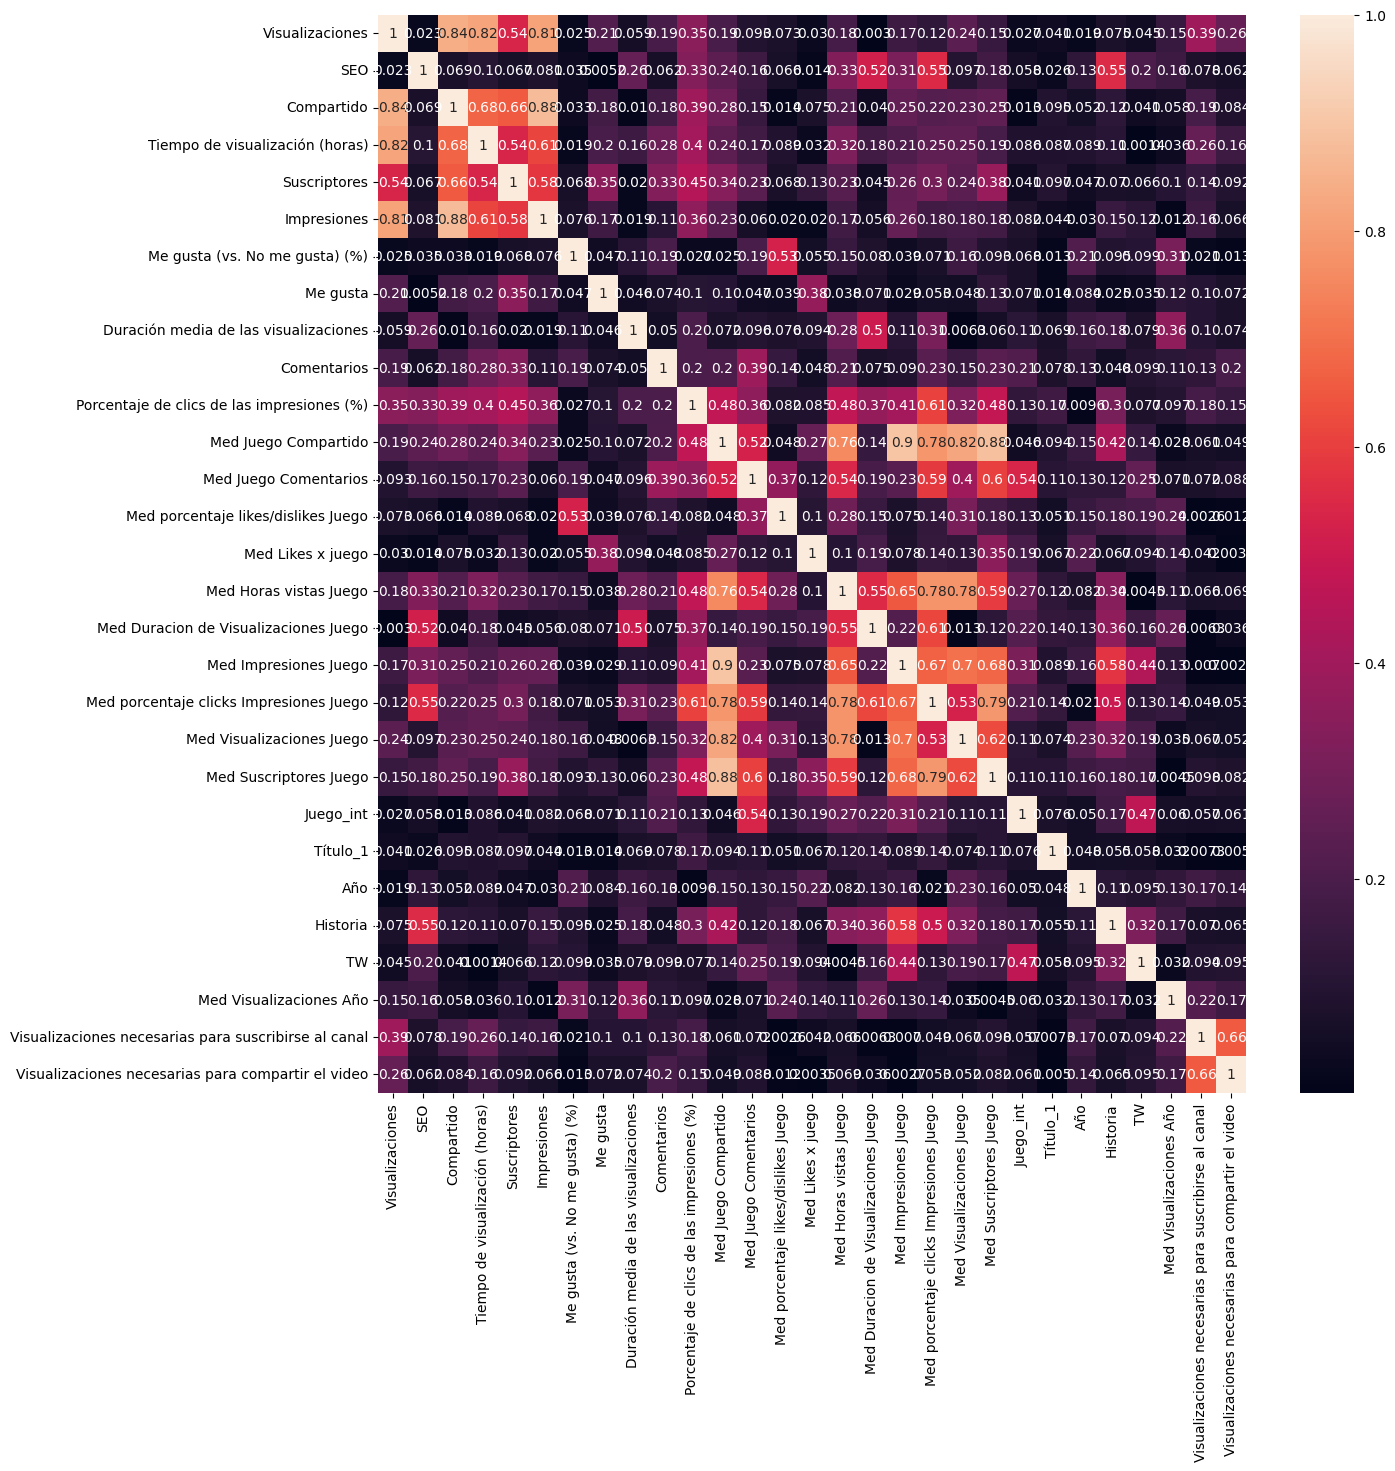

In [61]:
plt.figure(figsize= (14,14));
sns.heatmap(data.corr().abs(), annot=True);

In [62]:
corr = data.corr().abs() #para sacarlo con valores absolutos

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17048\939750392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs() #para sacarlo con valores absolutos


In [63]:
corr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de Visualizaciones
corr_visual.sort_values(ascending=False, by = 'Visualizaciones')

,Visualizaciones
Visualizaciones,1.000000
Compartido,0.840250
Tiempo de visualización (horas),0.818473
Impresiones,0.813631
Suscriptores,0.539642
Visualizaciones necesarias para suscribirse al canal,0.392815
Porcentaje de clics de las impresiones (%),0.345555
Visualizaciones necesarias para compartir el video,0.264041
Med Visualizaciones Juego,0.235958
Me gusta,0.212741


Guardar para streamlit

In [64]:
# para guardar el DataFrame como archivo CSV
data.to_csv('../data/streamlit.csv', index=False)

# ELIMINAR COLUMNAS INSERVIBLES Y LAS QUE NO VAYAN A PREDECIR CON 'SINCERIDAD' EL FUTURO AUNQUE TENGAN GRAN CORRELACIÓN.

ELIMINACIÓN DE VARIABLES QUE CORRELAN CON VISUALIZACIONES PERO NO SERÍAN FIELES TAN FIELES AL FUTURO

In [65]:
data.drop(columns=['Compartido', 'Tiempo de visualización (horas)', 'Suscriptores', 'Impresiones', 'Me gusta', 'Comentarios'], inplace=True)

In [66]:
#data.head(1)

ELIMINACIÓN DE VARIABLES QUE NO CORRELAN CON VISUALIZACIONES (incluidas las categóricas de Datos Duración media de las visualizaciones, Juego y Fecha)

In [67]:
data.drop(columns=['SEO', 'Año', 'Juego_int', 'Título_1', 'Med Duracion de Visualizaciones Juego', 'Me gusta (vs. No me gusta) (%)', 'Med Likes x juego', 'TW', 'Duración media de las visualizaciones', 'Med porcentaje likes/dislikes Juego', 'Historia', 'Med Juego Comentarios', 'Fecha', 'Juego', 'Datos Duración media de las visualizaciones'], inplace=True)

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17048\867827166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), annot=True);


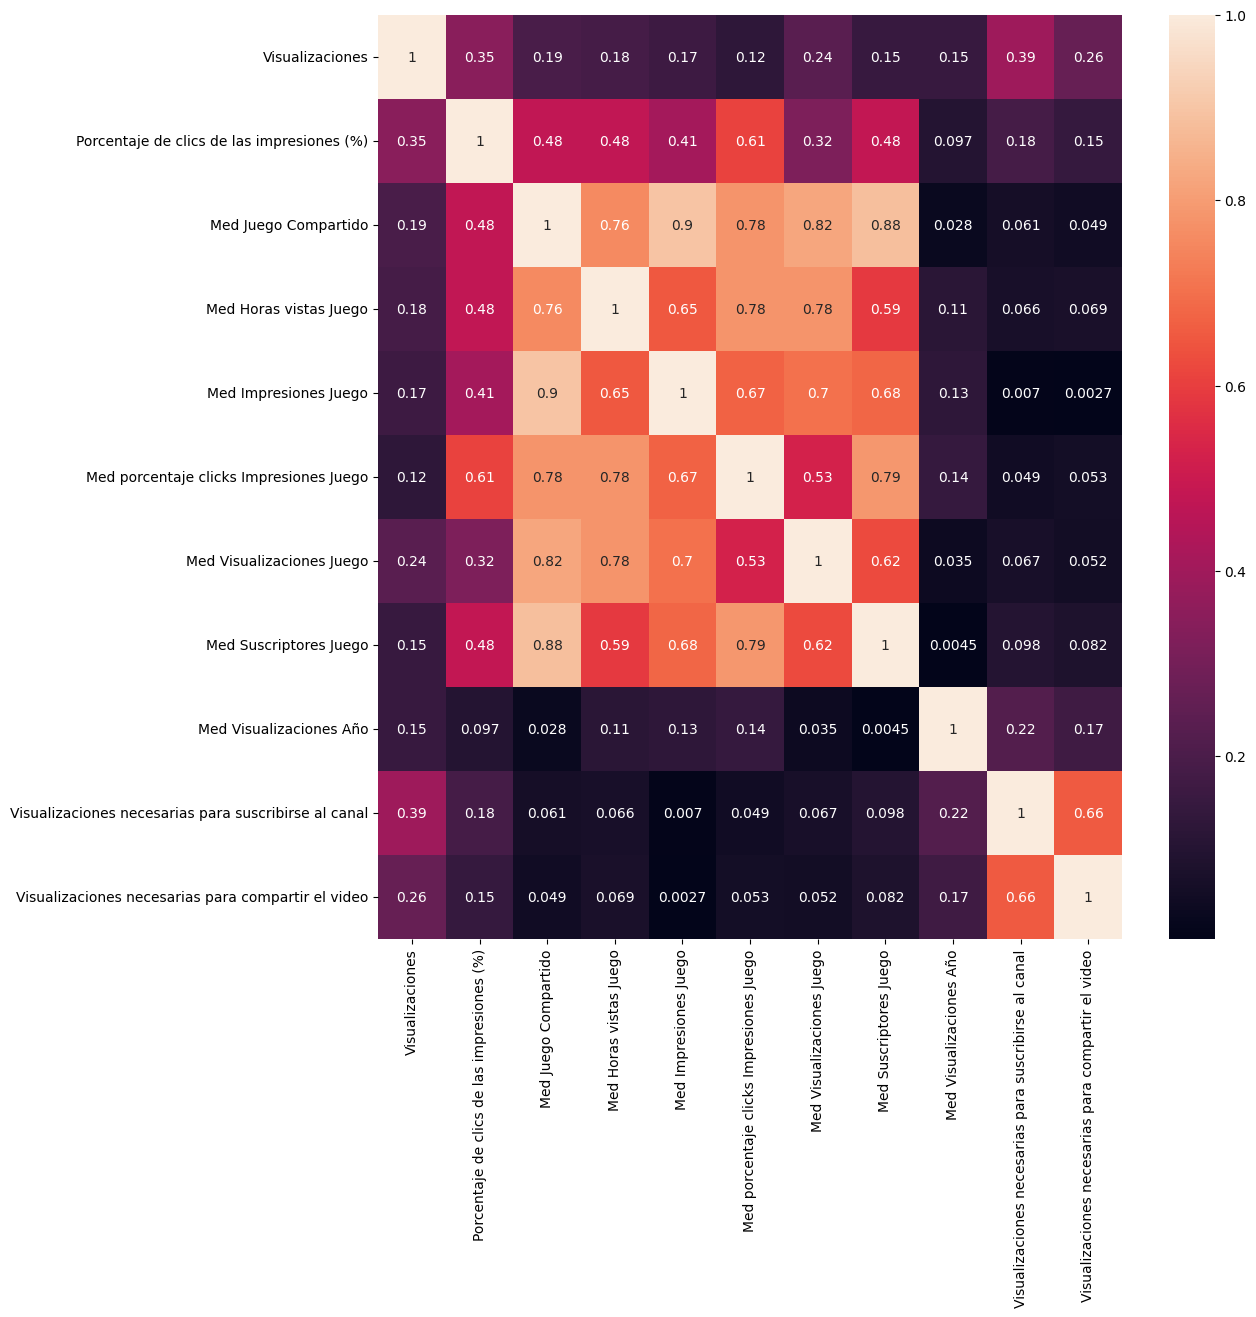

In [68]:
plt.figure(figsize= (12,12));
sns.heatmap(data.corr().abs(), annot=True);

In [69]:
corr = data.corr().abs() #para sacarlo con valores absolutos

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17048\939750392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs() #para sacarlo con valores absolutos


In [70]:
corr_visual2 = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones restantes de Visualizaciones
corr_visual2.sort_values(ascending=False, by = 'Visualizaciones')

,Visualizaciones
Visualizaciones,1.000000
Visualizaciones necesarias para suscribirse al canal,0.392815
Porcentaje de clics de las impresiones (%),0.345555
Visualizaciones necesarias para compartir el video,0.264041
Med Visualizaciones Juego,0.235958
Med Juego Compartido,0.194137
Med Horas vistas Juego,0.184287
Med Impresiones Juego,0.165220
Med Visualizaciones Año,0.149292
Med Suscriptores Juego,0.146927


In [75]:
data.describe()

,Visualizaciones,Porcentaje de clics de las impresiones (%),Med Juego Compartido,Med Horas vistas Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Med Visualizaciones Año,Visualizaciones necesarias para suscribirse al canal,Visualizaciones necesarias para compartir el video
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,573.903226,2.573206,1.707661,20.699135,2149.572581,2.573206,573.903226,1.282258,573.903226,101.451540,104.440840
std,2911.772419,2.145878,1.992954,31.428166,2201.711579,1.307111,687.055205,2.007599,434.705479,427.623785,469.296882
min,25.000000,0.000000,0.000000,0.215400,117.250000,0.310000,36.000000,-1.000000,28.333333,-433.000000,0.000000
25%,39.000000,1.120000,0.681818,3.637442,746.814103,1.714103,129.600000,0.400000,244.659091,0.000000,0.000000
50%,69.000000,1.955000,0.814103,5.180945,934.142857,2.230000,453.128205,1.076923,327.976471,0.000000,0.000000
75%,232.250000,3.312500,2.199427,14.001945,2457.090909,2.980400,737.468085,1.076923,1145.300000,0.000000,39.000000
max,47210.000000,12.150000,10.000000,123.856562,9411.941176,7.367059,3685.923077,11.000000,1299.755102,5477.000000,8049.000000


# GUARDAR ARCHIVO PROCESADO.

In [72]:
# para guardar el DataFrame como archivo CSV
data.to_csv('../data/processed.csv', index=False)